In [87]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [74]:
#fictional restaraunt data
data1=pd.read_csv("birthweight_smoking.csv")
col=['smoker','alcohol','birthweight', 'unmarried', 'educ', 'age']
data= data1[col]
data.head()

,smoker,alcohol,birthweight,unmarried,educ,age
0,1,0,4253,1,12,27
1,0,0,3459,0,16,24
2,1,0,2920,0,11,23
3,0,0,2600,0,17,28
4,0,0,3742,0,13,27


In [75]:
#summarizing the dataset
print(data.shape)

(3000, 6)


In [76]:
print(data.describe())

            smoker      alcohol  birthweight    unmarried         educ  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.194000     0.019333  3382.933667     0.226667    12.907000   
std       0.395495     0.137717   592.162889     0.418745     2.166699   
min       0.000000     0.000000   425.000000     0.000000     0.000000   
25%       0.000000     0.000000  3062.000000     0.000000    12.000000   
50%       0.000000     0.000000  3420.000000     0.000000    12.000000   
75%       0.000000     0.000000  3750.000000     0.000000    14.000000   
max       1.000000     1.000000  5755.000000     1.000000    17.000000   

               age  
count  3000.000000  
mean     26.889000  
std       5.362487  
min      14.000000  
25%      23.000000  
50%      27.000000  
75%      31.000000  
max      44.000000  


In [77]:
# class distribution
print(data.groupby('smoker').size())

smoker
0    2418
1     582
dtype: int64


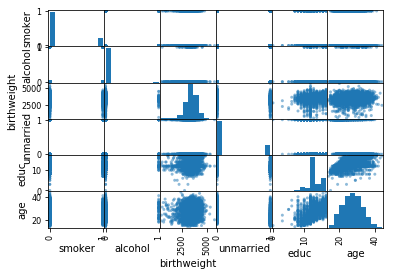

In [78]:
scatter_matrix(data)
plt.show()
#can detect correlations using scatter plot

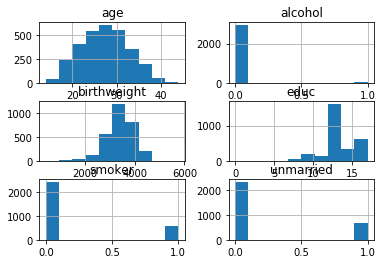

In [79]:
data.hist()
plt.show()


In [80]:
#Split the dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

train=data.values
Y=train[:,1]
X= train[:, 2:5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


#x_train and y_train can e used as test models now


In [91]:
#modeling
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

In [92]:
result = []
types = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=15, random_state=8)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    result.append(cv_results)
    types.append(name)
    display = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(display)

LR: 0.980417 (0.008498)
LDA: 0.980417 (0.008498)


In [95]:
#select best model
lr= LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
#print(classification_report(Y_validation, predictions))


0.9816666666666667
[[589   0]
 [ 11   0]]


In [ ]:
#The accuracy is 98%